In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:\labs\data_set\Total_weekly_air_passenger_numbers_on_Ansett_airline_flights_between_Melbourne_and_Sydney__1987___1992.csv")
df

,Unnamed: 0,X,First.Class,Business.Class,Economy.Class
0,108,108,1.636,1.524,19.260
1,109,109,1.741,2.212,18.781
2,110,110,1.597,1.777,17.445
3,111,111,1.943,2.552,19.628
4,112,112,1.660,1.889,17.692
...,...,...,...,...,...
171,279,279,1.458,3.053,28.837
172,280,280,1.398,2.745,26.548
173,281,281,1.423,3.156,27.279
174,282,282,1.358,3.069,27.306


## simple moving average

In [4]:
window_size = 10
df['Economy_Class_SMA'] = df['Economy.Class'].rolling(window=window_size).mean()

In [5]:
df

,Unnamed: 0,X,First.Class,Business.Class,Economy.Class,Economy_Class_SMA
0,108,108,1.636,1.524,19.260,NaN
1,109,109,1.741,2.212,18.781,NaN
2,110,110,1.597,1.777,17.445,NaN
3,111,111,1.943,2.552,19.628,NaN
4,112,112,1.660,1.889,17.692,NaN
...,...,...,...,...,...,...
171,279,279,1.458,3.053,28.837,28.1490
172,280,280,1.398,2.745,26.548,28.0128
173,281,281,1.423,3.156,27.279,28.1096
174,282,282,1.358,3.069,27.306,28.0864


In [7]:
import matplotlib.pyplot as plt

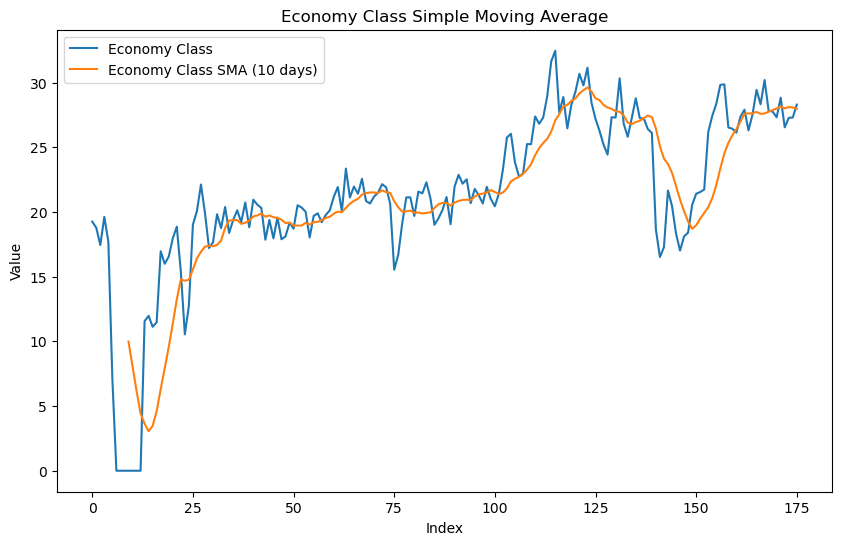

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Economy.Class'], label='Economy Class')
plt.plot(df['Economy_Class_SMA'], label=f'Economy Class SMA ({window_size} days)')
plt.title('Economy Class Simple Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [9]:
window_size = 15
df['Economy_Class_SMA'] = df['Economy.Class'].rolling(window=window_size).mean()

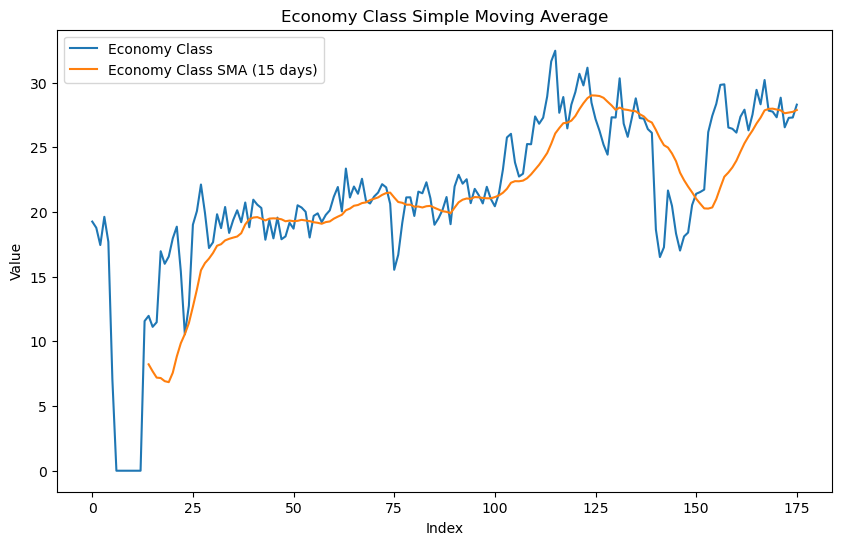

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['Economy.Class'], label='Economy Class')
plt.plot(df['Economy_Class_SMA'], label=f'Economy Class SMA ({window_size} days)')
plt.title('Economy Class Simple Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [12]:
window_size = 5
df['Economy_Class_SMA'] = df['Economy.Class'].rolling(window=window_size).mean()

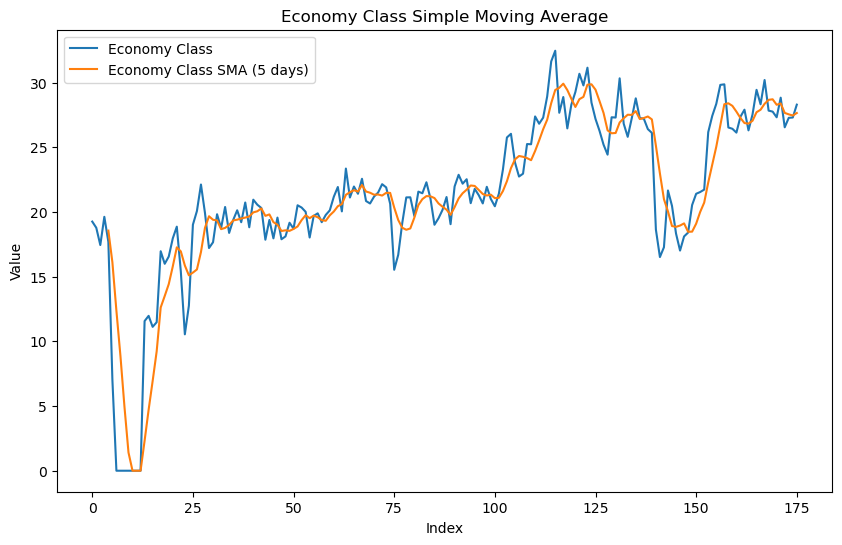

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df['Economy.Class'], label='Economy Class')
plt.plot(df['Economy_Class_SMA'], label=f'Economy Class SMA ({window_size} days)')
plt.title('Economy Class Simple Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## weighted central moving average

In [15]:
weights = [0.25, 0.5, 0.25]

In [25]:
def weighted_central_moving_average(values, weights):
    return values.rolling(window=len(weights), center=True).apply(lambda x: (x * weights).sum(), raw=True)

In [26]:
df['Economy_Class_WCMA'] = weighted_central_moving_average(df['Economy.Class'], weights)
df

,Unnamed: 0,X,First.Class,Business.Class,Economy.Class,Economy_Class_SMA,Economy_Class_WCMA
0,108,108,1.636,1.524,19.260,NaN,NaN
1,109,109,1.741,2.212,18.781,NaN,18.56675
2,110,110,1.597,1.777,17.445,NaN,18.32475
3,111,111,1.943,2.552,19.628,NaN,18.59825
4,112,112,1.660,1.889,17.692,18.5612,15.51450
...,...,...,...,...,...,...,...
171,279,279,1.458,3.053,28.837,28.3920,27.88600
172,280,280,1.398,2.745,26.548,27.6610,27.30300
173,281,281,1.423,3.156,27.279,27.5492,27.10300
174,282,282,1.358,3.069,27.306,27.4584,27.54750


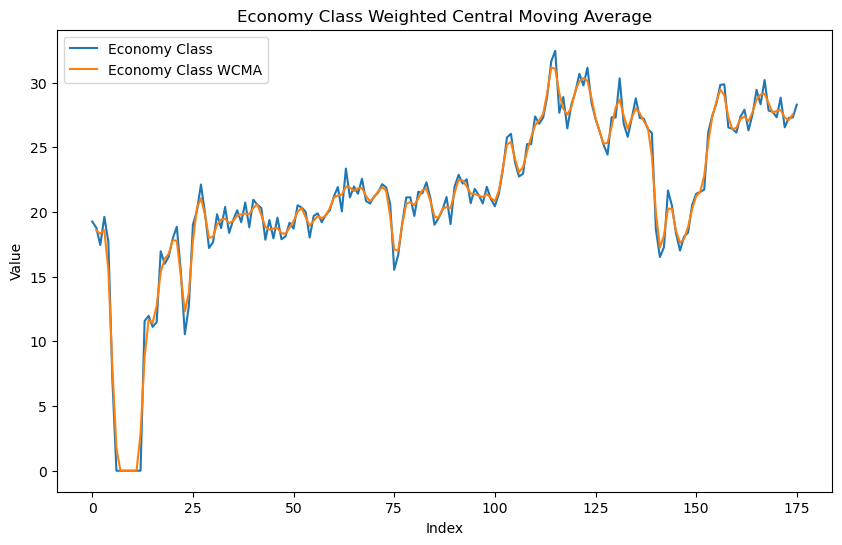

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(df['Economy.Class'], label='Economy Class')
plt.plot(df['Economy_Class_WCMA'], label='Economy Class WCMA')
plt.title('Economy Class Weighted Central Moving Average')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [28]:
def weighted_central_moving_median(values, weights):
    return values.rolling(window=len(weights), center=True).apply(lambda x: np.median(x * weights), raw=True)

In [29]:
df['Economy_Class_WCMedian'] = weighted_central_moving_median(df['Economy.Class'], weights)

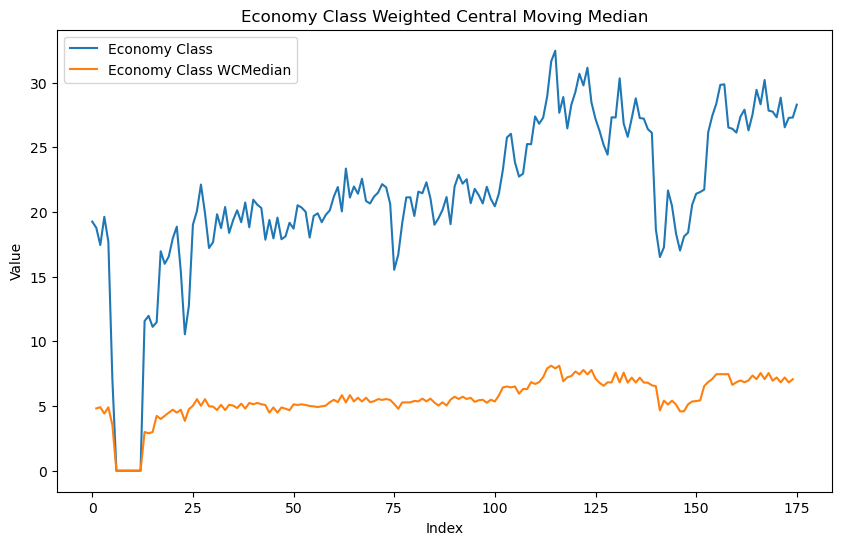

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df['Economy.Class'], label='Economy Class')
plt.plot(df['Economy_Class_WCMedian'], label='Economy Class WCMedian')
plt.title('Economy Class Weighted Central Moving Median')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [38]:
window_size = 20
df['Economy_Class_median'] = df['Economy.Class'].rolling(window=window_size).median()

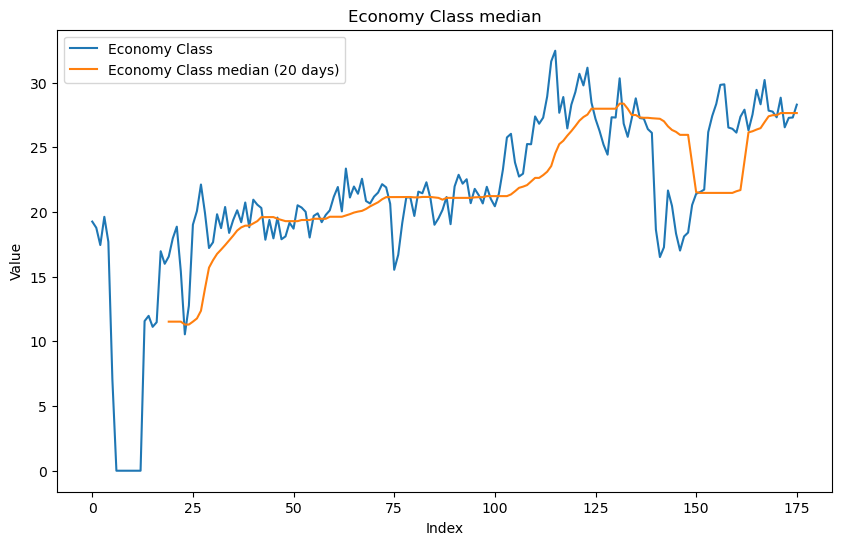

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(df['Economy.Class'], label='Economy Class')
plt.plot(df['Economy_Class_median'], label=f'Economy Class median ({window_size} days)')
plt.title('Economy Class median')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()